In [1]:
# Import standard library modules
import sys

# Set the relative path to the project root directory
relative_path_to_root = "../../../"

# Add the project root to the system path for importing in-house modules
sys.path.append(relative_path_to_root)

# Import in-house modules from the 'utilities' package
from utilities import calculate_bollinger_bands, calculate_rsi
from utilities import print_title, print_label, print_footer
from utilities import generate_trading_signals

In [2]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import yfinance as yf # Yahoo Finance data retrieval

# Import libraries for signal processing and peak detection
from scipy.signal import find_peaks

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh') # Use Bokeh as the backend for Holoviews

# Import libraries for data storage and retrieval
from pathlib import Path

In [3]:
# Set display options for Pandas (optional, but often helpful)
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Suppress scientific notation

In [4]:
data = pd.read_csv(
    Path("../../../data/raw_data/sp500_adj_close_2000-01-01_2024-10-14.csv"),
    index_col='Date',
    parse_dates=True
)

print("Shape:", data.shape)
data

Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,43.463,0.844,0.000,0.000,8.288,1.278,0.000,16.275,28.215,6.307,...,0.000,11.353,0.000,6.848,18.036,0.000,4.634,0.000,25.028,0.000
2000-01-04 00:00:00+00:00,40.143,0.773,0.000,0.000,8.051,1.271,0.000,14.909,26.787,6.242,...,0.000,10.926,0.000,7.006,17.690,0.000,4.541,0.000,24.667,0.000
2000-01-05 00:00:00+00:00,37.653,0.784,0.000,0.000,8.037,1.389,0.000,15.204,27.178,6.143,...,0.000,11.505,0.000,7.276,18.655,0.000,4.564,0.000,25.139,0.000
2000-01-06 00:00:00+00:00,36.219,0.716,0.000,0.000,8.318,1.375,0.000,15.328,26.435,6.176,...,0.000,12.043,0.000,7.209,19.619,0.000,4.526,0.000,23.778,0.000
2000-01-07 00:00:00+00:00,39.237,0.750,0.000,0.000,8.407,1.451,0.000,16.073,27.178,6.274,...,0.000,11.647,0.000,7.209,19.562,0.000,4.425,0.000,23.514,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,143.890,221.690,192.076,130.230,112.828,107.790,355.354,487.300,226.510,58.860,...,287.990,32.850,106.410,63.010,125.370,134.030,135.880,102.280,365.240,187.280
2024-10-08 00:00:00+00:00,144.610,225.770,191.481,132.500,114.092,109.910,358.919,496.240,229.400,57.550,...,292.940,33.110,102.880,62.930,122.040,134.200,134.720,101.770,368.970,187.370
2024-10-09 00:00:00+00:00,144.800,229.540,193.207,135.490,115.406,113.090,363.600,494.080,233.240,56.970,...,298.050,33.060,104.150,62.580,122.090,136.290,134.760,103.460,373.500,190.170


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6234 entries, 2000-01-03 00:00:00+00:00 to 2024-10-11 00:00:00+00:00
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 23.9 MB


### Feature Engineering
___

In [6]:
# Confirm that there are no missing values in the adj close data
data.isnull().sum().sum()

0

### Generate Target Labels: Stock Signals

In [7]:
# Generate the signals for each ticker in the DataFrame

signals = data.copy().apply(generate_trading_signals)

print("`signals` Shape:", signals.shape)
display(signals)

`signals` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2000-01-04 00:00:00+00:00,short,buy,<NA>,<NA>,short,buy,<NA>,buy,buy,short,...,<NA>,buy,<NA>,hold,buy,<NA>,buy,<NA>,buy,<NA>
2000-01-05 00:00:00+00:00,short,sell,<NA>,<NA>,buy,sell,<NA>,hold,sell,buy,...,<NA>,hold,<NA>,sell,hold,<NA>,sell,<NA>,sell,<NA>
2000-01-06 00:00:00+00:00,buy,buy,<NA>,<NA>,hold,buy,<NA>,hold,buy,hold,...,<NA>,sell,<NA>,short,sell,<NA>,short,<NA>,short,<NA>
2000-01-07 00:00:00+00:00,hold,sell,<NA>,<NA>,sell,hold,<NA>,hold,hold,hold,...,<NA>,short,<NA>,short,short,<NA>,buy,<NA>,buy,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,buy,buy,short,hold,hold,buy,buy,buy,buy,short,...,buy,buy,sell,short,sell,hold,short,short,buy,buy
2024-10-08 00:00:00+00:00,hold,hold,buy,hold,hold,hold,hold,sell,hold,short,...,hold,sell,buy,short,buy,hold,buy,buy,hold,hold
2024-10-09 00:00:00+00:00,sell,sell,sell,sell,sell,hold,sell,buy,sell,buy,...,sell,short,sell,short,hold,sell,sell,sell,sell,hold


### Generate Feature: Volatility

In [8]:
# Calculate various indicators
volatility = data.copy().pct_change()

# Handle inf values in the volatility DataFrame
volatility.replace([np.inf, -np.inf], np.nan, inplace=True)

# Align data lengths by filling forward and backward
volatility.ffill(inplace=True)
volatility.bfill(inplace=True)

print("`volatility` Shape:", volatility.shape)
display(volatility.head())

`volatility` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,-0.076,-0.084,-0.008,-0.038,-0.029,-0.005,-0.011,-0.084,-0.051,-0.010,...,-0.003,-0.038,0.000,0.023,-0.019,0.045,-0.020,-0.056,-0.014,0.000
2000-01-04 00:00:00+00:00,-0.076,-0.084,-0.008,-0.038,-0.029,-0.005,-0.011,-0.084,-0.051,-0.010,...,-0.003,-0.038,0.000,0.023,-0.019,0.045,-0.020,-0.056,-0.014,0.000
2000-01-05 00:00:00+00:00,-0.062,0.015,-0.008,-0.038,-0.002,0.093,-0.011,0.020,0.015,-0.016,...,-0.003,0.053,0.000,0.039,0.055,0.045,0.005,-0.056,0.019,0.000
2000-01-06 00:00:00+00:00,-0.038,-0.087,-0.008,-0.038,0.035,-0.010,-0.011,0.008,-0.027,0.005,...,-0.003,0.047,0.000,-0.009,0.052,0.045,-0.009,-0.056,-0.054,0.000
2000-01-07 00:00:00+00:00,0.083,0.047,-0.008,-0.038,0.011,0.056,-0.011,0.049,0.028,0.016,...,-0.003,-0.033,0.000,0.000,-0.003,0.045,-0.022,-0.056,-0.011,0.000


### Generate Feature: RSI

In [9]:
rsi = data.copy().apply(calculate_rsi)

rsi.ffill(inplace=True)
rsi.bfill(inplace=True)

print("`rsi` Shape:", rsi.shape)
display(rsi.head())

`rsi` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,44.942,49.521,100.000,100.000,27.934,89.286,100.000,44.917,57.410,67.391,...,100.000,37.565,100.000,63.043,66.163,100.000,22.641,100.000,66.614,100.000
2000-01-04 00:00:00+00:00,44.942,49.521,100.000,100.000,27.934,89.286,100.000,44.917,57.410,67.391,...,100.000,37.565,100.000,63.043,66.163,100.000,22.641,100.000,66.614,100.000
2000-01-05 00:00:00+00:00,44.942,49.521,100.000,100.000,27.934,89.286,100.000,44.917,57.410,67.391,...,100.000,37.565,100.000,63.043,66.163,100.000,22.641,100.000,66.614,100.000
2000-01-06 00:00:00+00:00,44.942,49.521,100.000,100.000,27.934,89.286,100.000,44.917,57.410,67.391,...,100.000,37.565,100.000,63.043,66.163,100.000,22.641,100.000,66.614,100.000
2000-01-07 00:00:00+00:00,44.942,49.521,100.000,100.000,27.934,89.286,100.000,44.917,57.410,67.391,...,100.000,37.565,100.000,63.043,66.163,100.000,22.641,100.000,66.614,100.000


### Generate Feature: SMA 50

In [10]:
sma_50 = data.copy().rolling(window=50).mean()
sma_50.ffill(inplace=True)
sma_50.bfill(inplace=True)

print("`sma_50` Shape:", sma_50.shape)
display(sma_50.head())

`sma_50` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,53.148,0.835,0.000,0.000,7.847,1.602,0.000,19.180,38.176,5.973,...,0.000,9.425,0.000,6.742,18.377,0.000,3.759,0.000,27.520,0.000
2000-01-04 00:00:00+00:00,53.148,0.835,0.000,0.000,7.847,1.602,0.000,19.180,38.176,5.973,...,0.000,9.425,0.000,6.742,18.377,0.000,3.759,0.000,27.520,0.000
2000-01-05 00:00:00+00:00,53.148,0.835,0.000,0.000,7.847,1.602,0.000,19.180,38.176,5.973,...,0.000,9.425,0.000,6.742,18.377,0.000,3.759,0.000,27.520,0.000
2000-01-06 00:00:00+00:00,53.148,0.835,0.000,0.000,7.847,1.602,0.000,19.180,38.176,5.973,...,0.000,9.425,0.000,6.742,18.377,0.000,3.759,0.000,27.520,0.000
2000-01-07 00:00:00+00:00,53.148,0.835,0.000,0.000,7.847,1.602,0.000,19.180,38.176,5.973,...,0.000,9.425,0.000,6.742,18.377,0.000,3.759,0.000,27.520,0.000


### Generate Feature: SMA 100

In [11]:
sma_100 = data.copy().rolling(window=100).mean()

sma_100.ffill(inplace=True)
sma_100.bfill(inplace=True)

print("`sma_100` Shape:", sma_100.shape)
display(sma_100.head())

`sma_100` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,55.094,0.865,0.000,0.000,8.408,1.664,0.000,23.272,41.488,5.729,...,0.000,9.250,0.000,7.194,18.405,0.000,3.838,0.000,24.997,0.000
2000-01-04 00:00:00+00:00,55.094,0.865,0.000,0.000,8.408,1.664,0.000,23.272,41.488,5.729,...,0.000,9.250,0.000,7.194,18.405,0.000,3.838,0.000,24.997,0.000
2000-01-05 00:00:00+00:00,55.094,0.865,0.000,0.000,8.408,1.664,0.000,23.272,41.488,5.729,...,0.000,9.250,0.000,7.194,18.405,0.000,3.838,0.000,24.997,0.000
2000-01-06 00:00:00+00:00,55.094,0.865,0.000,0.000,8.408,1.664,0.000,23.272,41.488,5.729,...,0.000,9.250,0.000,7.194,18.405,0.000,3.838,0.000,24.997,0.000
2000-01-07 00:00:00+00:00,55.094,0.865,0.000,0.000,8.408,1.664,0.000,23.272,41.488,5.729,...,0.000,9.250,0.000,7.194,18.405,0.000,3.838,0.000,24.997,0.000


### Generate Feature: SMA 200

In [12]:
sma_200 = data.rolling(window=200).mean()

sma_200.ffill(inplace=True)
sma_200.bfill(inplace=True)

print("`sma_200` Shape:", sma_200.shape)
display(sma_200.head())

`sma_200` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,45.252,0.799,0.000,0.000,9.378,1.687,0.000,27.789,46.669,5.507,...,0.000,8.352,0.000,8.053,18.904,0.000,3.723,0.000,23.156,0.000
2000-01-04 00:00:00+00:00,45.252,0.799,0.000,0.000,9.378,1.687,0.000,27.789,46.669,5.507,...,0.000,8.352,0.000,8.053,18.904,0.000,3.723,0.000,23.156,0.000
2000-01-05 00:00:00+00:00,45.252,0.799,0.000,0.000,9.378,1.687,0.000,27.789,46.669,5.507,...,0.000,8.352,0.000,8.053,18.904,0.000,3.723,0.000,23.156,0.000
2000-01-06 00:00:00+00:00,45.252,0.799,0.000,0.000,9.378,1.687,0.000,27.789,46.669,5.507,...,0.000,8.352,0.000,8.053,18.904,0.000,3.723,0.000,23.156,0.000
2000-01-07 00:00:00+00:00,45.252,0.799,0.000,0.000,9.378,1.687,0.000,27.789,46.669,5.507,...,0.000,8.352,0.000,8.053,18.904,0.000,3.723,0.000,23.156,0.000


### Generate Features: Upper Band & Lower Band

In [13]:
upper_band, lower_band = calculate_bollinger_bands(data)

upper_band.ffill(inplace=True)
upper_band.bfill(inplace=True)
lower_band.ffill(inplace=True)
lower_band.bfill(inplace=True)

print("`upper_band` Shape:", upper_band.shape)
display(upper_band.head())

print("`lower_band` Shape:", lower_band.shape)
display(lower_band.head())

`upper_band` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,44.085,0.887,0.000,0.000,8.738,1.897,0.000,16.969,33.295,6.963,...,0.000,12.425,0.000,7.433,20.272,0.000,4.986,0.000,29.169,0.000
2000-01-04 00:00:00+00:00,44.085,0.887,0.000,0.000,8.738,1.897,0.000,16.969,33.295,6.963,...,0.000,12.425,0.000,7.433,20.272,0.000,4.986,0.000,29.169,0.000
2000-01-05 00:00:00+00:00,44.085,0.887,0.000,0.000,8.738,1.897,0.000,16.969,33.295,6.963,...,0.000,12.425,0.000,7.433,20.272,0.000,4.986,0.000,29.169,0.000
2000-01-06 00:00:00+00:00,44.085,0.887,0.000,0.000,8.738,1.897,0.000,16.969,33.295,6.963,...,0.000,12.425,0.000,7.433,20.272,0.000,4.986,0.000,29.169,0.000
2000-01-07 00:00:00+00:00,44.085,0.887,0.000,0.000,8.738,1.897,0.000,16.969,33.295,6.963,...,0.000,12.425,0.000,7.433,20.272,0.000,4.986,0.000,29.169,0.000


`lower_band` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,37.469,0.671,0.000,0.000,6.952,1.263,0.000,14.094,25.959,5.882,...,0.000,8.918,0.000,6.805,17.965,0.000,3.429,0.000,22.667,0.000
2000-01-04 00:00:00+00:00,37.469,0.671,0.000,0.000,6.952,1.263,0.000,14.094,25.959,5.882,...,0.000,8.918,0.000,6.805,17.965,0.000,3.429,0.000,22.667,0.000
2000-01-05 00:00:00+00:00,37.469,0.671,0.000,0.000,6.952,1.263,0.000,14.094,25.959,5.882,...,0.000,8.918,0.000,6.805,17.965,0.000,3.429,0.000,22.667,0.000
2000-01-06 00:00:00+00:00,37.469,0.671,0.000,0.000,6.952,1.263,0.000,14.094,25.959,5.882,...,0.000,8.918,0.000,6.805,17.965,0.000,3.429,0.000,22.667,0.000
2000-01-07 00:00:00+00:00,37.469,0.671,0.000,0.000,6.952,1.263,0.000,14.094,25.959,5.882,...,0.000,8.918,0.000,6.805,17.965,0.000,3.429,0.000,22.667,0.000


### Generate Features: Support & Resistance

In [14]:
support = data.rolling(window=50).min()
support.ffill(inplace=True)
support.bfill(inplace=True)

resistance = data.rolling(window=50).max()
resistance.ffill(inplace=True)
resistance.bfill(inplace=True)

print("`support` Shape:", support.shape)
display(support.head())

print("`resistance` Shape:", resistance.shape)
display(resistance.head())

`support` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,36.219,0.657,0.000,0.000,7.050,1.271,0.000,13.668,26.435,4.783,...,0.000,7.975,0.000,5.857,16.458,0.000,3.190,0.000,23.514,0.000
2000-01-04 00:00:00+00:00,36.219,0.657,0.000,0.000,7.050,1.271,0.000,13.668,26.435,4.783,...,0.000,7.975,0.000,5.857,16.458,0.000,3.190,0.000,23.514,0.000
2000-01-05 00:00:00+00:00,36.219,0.657,0.000,0.000,7.050,1.271,0.000,13.668,26.435,4.783,...,0.000,7.975,0.000,5.857,16.458,0.000,3.190,0.000,23.514,0.000
2000-01-06 00:00:00+00:00,36.219,0.657,0.000,0.000,7.050,1.271,0.000,13.668,26.435,4.783,...,0.000,7.975,0.000,5.857,16.458,0.000,3.190,0.000,23.514,0.000
2000-01-07 00:00:00+00:00,36.219,0.657,0.000,0.000,7.050,1.271,0.000,13.668,26.435,4.783,...,0.000,7.975,0.000,5.857,16.458,0.000,3.190,0.000,23.514,0.000


`resistance` Shape: (6234, 501)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,95.981,0.983,0.000,0.000,8.582,1.764,0.000,26.406,57.133,7.030,...,0.000,12.043,0.000,7.367,19.706,0.000,4.634,0.000,30.944,0.000
2000-01-04 00:00:00+00:00,95.981,0.983,0.000,0.000,8.582,1.764,0.000,26.406,57.133,7.030,...,0.000,12.043,0.000,7.367,19.706,0.000,4.634,0.000,30.944,0.000
2000-01-05 00:00:00+00:00,95.981,0.983,0.000,0.000,8.582,1.764,0.000,26.406,57.133,7.030,...,0.000,12.043,0.000,7.367,19.706,0.000,4.634,0.000,30.944,0.000
2000-01-06 00:00:00+00:00,95.981,0.983,0.000,0.000,8.582,1.764,0.000,26.406,57.133,7.030,...,0.000,12.043,0.000,7.367,19.706,0.000,4.634,0.000,30.944,0.000
2000-01-07 00:00:00+00:00,95.981,0.983,0.000,0.000,8.582,1.764,0.000,26.406,57.133,7.030,...,0.000,12.043,0.000,7.367,19.706,0.000,4.634,0.000,30.944,0.000


### Data Manipulation
___

In [15]:
# Compile indicators into a single DataFrame
length = len(data) * len(data.columns)

indicators_df = pd.DataFrame({
    'Date': np.repeat(data.index, len(data.columns)),
    'Ticker': np.tile(data.columns, len(data)),
    'Adjusted Close': data.values.flatten(),
    'Volatility': volatility.values.flatten(),
    'RSI': rsi.values.flatten(),
    'SMA_50': sma_50.values.flatten(),
    'SMA_100': sma_100.values.flatten(),
    'SMA_200': sma_200.values.flatten(),
    'Upper Band': upper_band.values.flatten(),
    'Lower Band': lower_band.values.flatten(),
    'Support': support.values.flatten(),
    'Resistance': resistance.values.flatten(),
    'Actions': signals.values.flatten()
})

print("`indicators_df` Shape:", indicators_df.shape)
display(indicators_df)

`indicators_df` Shape: (3123234, 13)


,Date,Ticker,Adjusted Close,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance,Actions
0,2000-01-03 00:00:00+00:00,A,43.463,-0.076,44.942,53.148,55.094,45.252,44.085,37.469,36.219,95.981,<NA>
1,2000-01-03 00:00:00+00:00,AAPL,0.844,-0.084,49.521,0.835,0.865,0.799,0.887,0.671,0.657,0.983,<NA>
2,2000-01-03 00:00:00+00:00,ABBV,0.000,-0.008,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,<NA>
3,2000-01-03 00:00:00+00:00,ABNB,0.000,-0.038,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,<NA>
4,2000-01-03 00:00:00+00:00,ABT,8.288,-0.029,27.934,7.847,8.408,9.378,8.738,6.952,7.050,8.582,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123229,2024-10-11 00:00:00+00:00,XYL,136.860,0.020,58.723,132.518,135.119,129.765,136.597,131.961,125.806,137.530,<NA>
3123230,2024-10-11 00:00:00+00:00,YUM,134.020,0.006,59.580,135.019,133.755,133.695,141.459,128.389,129.710,139.920,<NA>
3123231,2024-10-11 00:00:00+00:00,ZBH,103.500,0.007,35.770,108.073,109.034,116.171,109.532,101.650,101.770,115.912,<NA>
3123232,2024-10-11 00:00:00+00:00,ZBRA,375.020,0.016,62.380,346.480,331.589,305.596,379.775,350.045,314.650,375.020,<NA>


### Handle Missing Values
___

In [16]:
# Inspect for missing values in the indicators DataFrame
indicators_df.isnull().sum()

Date                   0
Ticker                 0
Adjusted Close         0
Volatility             0
RSI                    0
SMA_50                 0
SMA_100                0
SMA_200                0
Upper Band             0
Lower Band             0
Support                0
Resistance             0
Actions           374738
dtype: int64

In [17]:
# Drop NaN values
indicators_df.dropna(subset=['Adjusted Close', 'Volatility', 'RSI', 'SMA_50', 'SMA_100', 'SMA_200', 'Upper Band', 'Lower Band', 'Support', 'Resistance', 'Actions'], inplace=True)

print("`indicators_df` Shape:", indicators_df.shape)
display(indicators_df)

`indicators_df` Shape: (2748496, 13)


,Date,Ticker,Adjusted Close,Volatility,RSI,SMA_50,SMA_100,SMA_200,Upper Band,Lower Band,Support,Resistance,Actions
501,2000-01-04 00:00:00+00:00,A,40.143,-0.076,44.942,53.148,55.094,45.252,44.085,37.469,36.219,95.981,short
502,2000-01-04 00:00:00+00:00,AAPL,0.773,-0.084,49.521,0.835,0.865,0.799,0.887,0.671,0.657,0.983,buy
505,2000-01-04 00:00:00+00:00,ABT,8.051,-0.029,27.934,7.847,8.408,9.378,8.738,6.952,7.050,8.582,short
506,2000-01-04 00:00:00+00:00,ACGL,1.271,-0.005,89.286,1.602,1.664,1.687,1.897,1.263,1.271,1.764,buy
508,2000-01-04 00:00:00+00:00,ADBE,14.909,-0.084,44.917,19.180,23.272,27.789,16.969,14.094,13.668,26.406,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122728,2024-10-10 00:00:00+00:00,XYL,134.170,-0.016,47.112,132.440,135.201,129.645,136.446,131.509,125.806,137.530,buy
3122729,2024-10-10 00:00:00+00:00,YUM,133.270,-0.011,59.388,135.015,133.798,133.667,141.454,128.357,129.710,139.920,buy
3122730,2024-10-10 00:00:00+00:00,ZBH,102.820,-0.006,37.926,108.221,109.184,116.257,109.536,101.899,101.770,115.912,buy
3122731,2024-10-10 00:00:00+00:00,ZBRA,369.240,-0.011,52.500,345.831,331.041,305.099,381.553,344.513,314.650,373.500,buy


In [18]:
# Inspection for missing values in the indicators DataFrame
indicators_df.isnull().sum()

Date              0
Ticker            0
Adjusted Close    0
Volatility        0
RSI               0
SMA_50            0
SMA_100           0
SMA_200           0
Upper Band        0
Lower Band        0
Support           0
Resistance        0
Actions           0
dtype: int64

### Data Visualization
___

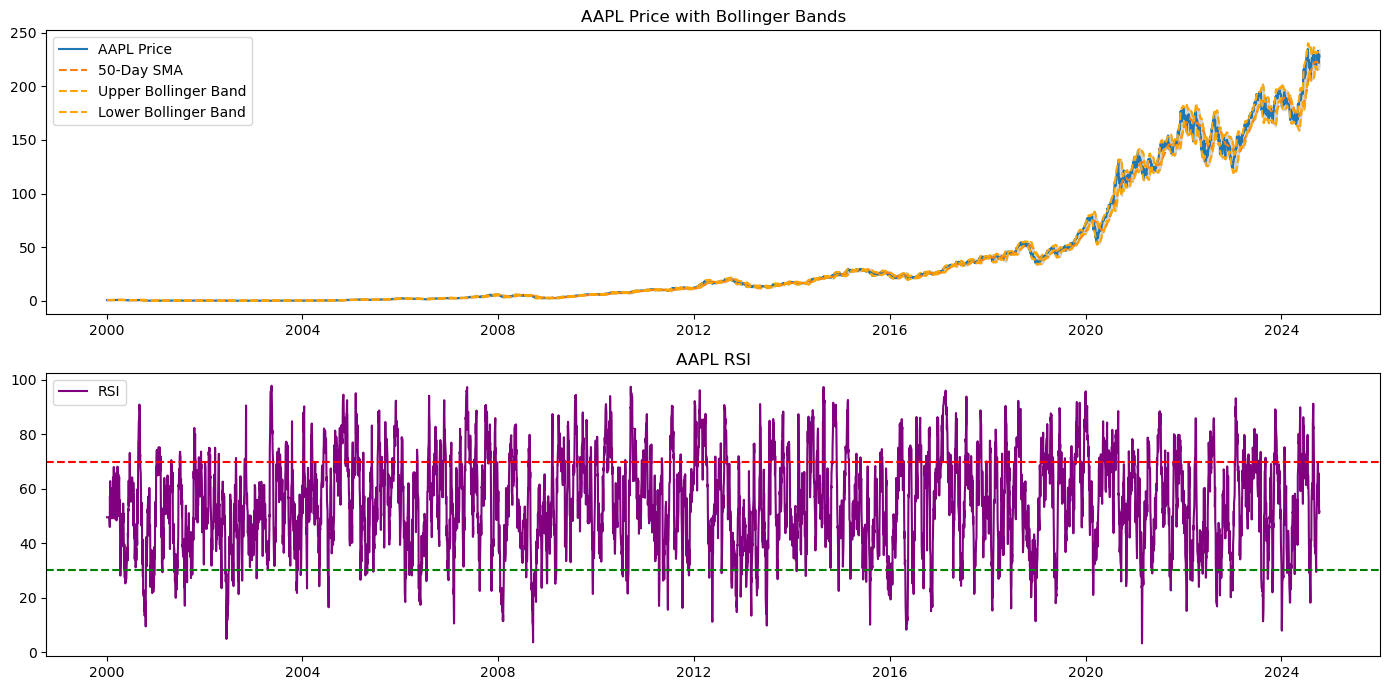

In [19]:
# Plot RSI and Bollinger Bands for a sample stock (e.g., AAPL)
ticker_sample = 'AAPL'
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data[ticker_sample], label=f'{ticker_sample} Price')
plt.plot(sma_50[ticker_sample], label='50-Day SMA', linestyle='--')
plt.plot(upper_band[ticker_sample], label='Upper Bollinger Band', linestyle='--', color='orange')
plt.plot(lower_band[ticker_sample], label='Lower Bollinger Band', linestyle='--', color='orange')
plt.fill_between(data.index, lower_band[ticker_sample], upper_band[ticker_sample], color='lightgray')
plt.legend()
plt.title(f'{ticker_sample} Price with Bollinger Bands')
plt.subplot(2, 1, 2)
plt.plot(rsi[ticker_sample], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.title(f'{ticker_sample} RSI')
plt.tight_layout()
plt.show()

In [20]:
# Prepare data for plotting
ticker_sample = 'AAPL'
data_sample = data[[ticker_sample]].copy()
data_sample['SMA_50'] = sma_50[ticker_sample]
data_sample['SMA_100'] = sma_100[ticker_sample]
data_sample['SMA_200'] = sma_200[ticker_sample]
data_sample['RSI'] = rsi[ticker_sample]
data_sample['Support'] = support[ticker_sample]
data_sample['Resistance'] = resistance[ticker_sample]

# Plot
price_plot = data_sample.hvplot.line(y=[ticker_sample, 'SMA_50', 'SMA_100', 'SMA_200'], title=f'{ticker_sample} Price with Bollinger Bands, SMA, and Resistance Levels', ylabel='Price')
support_resistance_plot = data_sample.hvplot.line(y=['Support', 'Resistance'], line_dash='dashed', color=['green', 'red'])
rsi_plot = data_sample.hvplot.line(y='RSI', title=f'{ticker_sample} RSI', ylabel='RSI').opts(yformatter='%.0f') * hv.HLine(70).opts(color='red', line_dash='dashed') * hv.HLine(30).opts(color='green', line_dash='dashed')

(price_plot * support_resistance_plot + rsi_plot).cols(1)


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I  :NdOverlay   [Variable]
         :Curve   [Date]   (value)
      .NdOverlay.II :NdOverlay   [Variable]
         :Curve   [Date]   (value)
   .Overlay.II :Overlay
      .Curve.I  :Curve   [Date]   (RSI)
      .HLine.I  :HLine   [x,y]
      .HLine.II :HLine   [x,y]